### Import packages

In [2]:
import unittest

import arviz as az
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import seaborn as sns
sns.set()
sns.set_palette("tab10")

import random as rnd
import numpy as np
rnd.seed(0)
np.random.seed(0)

import scipy.stats as stats
import pandas as pd

import pymc3 as pm

#### Utils

In [5]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

### Generate data


-> data_y
[0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0]

-> num of pos
257/500 = 0.51400


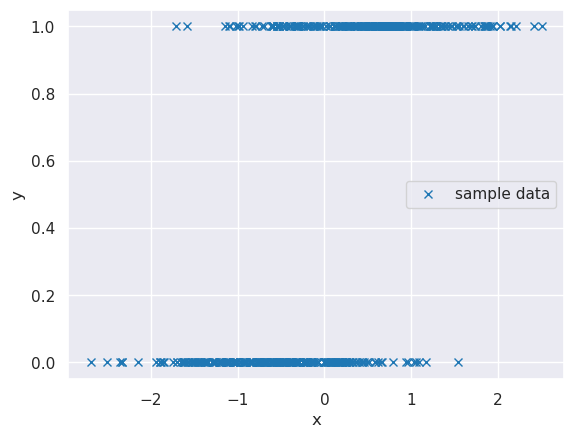

In [53]:
# parameters
true_weights = 2.0

# generate amd plot data
num_data = 500
# data_x = np.linspace(-10, 10, num_data)
data_x = np.random.randn(num_data)

mean = sigmoid(data_x*true_weights)
data_y = np.random.binomial(1,mean)

print(f"\n-> data_y")
print(data_y[:20])
print(f"\n-> num of pos")
print(f"{np.sum(data_y)}/{len(data_y)} = {np.sum(data_y)/len(data_y):0.5f}")

fig, axes = plt.subplots(1,1)
axes.plot(data_x, data_y, "x", label='sample data')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.legend(loc=0)


### Inference using Sampling

In [54]:
with pm.Model() as model:  # model specifications in PyMC3
    prior_weights = pm.Normal("weights", 0, sigma=1)

    likelihood = pm.Bernoulli(
        "y", p = sigmoid(data_x*prior_weights), observed=data_y)

    sampled_struct = pm.sample(draws=1000, chains=2, return_inferencedata=True)

# print(f"\n-> sampled_struct")
# print(sampled_struct)
az.plot_trace(sampled_struct)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [weights]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.



-> sampled_struct
Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data


In [61]:
# print(f"\n-> posterior")
# print(res_struct.posterior)

# print(f"\n-> posterior.weights")
# print(res_struct.posterior.weights.shape)

### Inference using VI Approximation

Finished [100%]: Average Loss = 239.52
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [weights]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.


array([[<AxesSubplot:title={'center':'weights'}>,
        <AxesSubplot:title={'center':'weights'}>]], dtype=object)

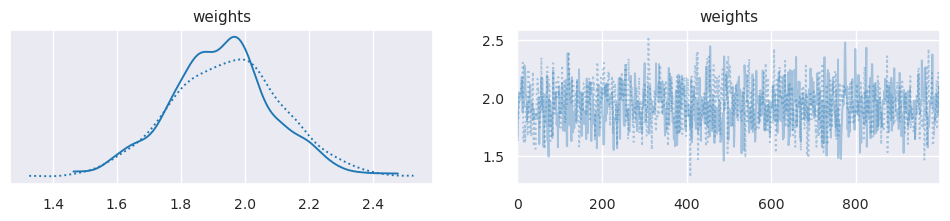

In [63]:
with pm.Model() as model:  # model specifications in PyMC3
    prior_weights = pm.Normal("weights", 0, sigma=1)

    likelihood = pm.Bernoulli(
        "y", p = sigmoid(data_x*prior_weights), observed=data_y)

    approx = pm.fit()
    approx_struct = pm.sample(draws=1000, chains=2, return_inferencedata=True)

# print(f"\n-> approx_struct")
# print(approx_struct)
az.plot_trace(approx_struct)

### Inference using Stein Approximation

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [weights]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.


array([[<AxesSubplot:title={'center':'weights'}>,
        <AxesSubplot:title={'center':'weights'}>]], dtype=object)

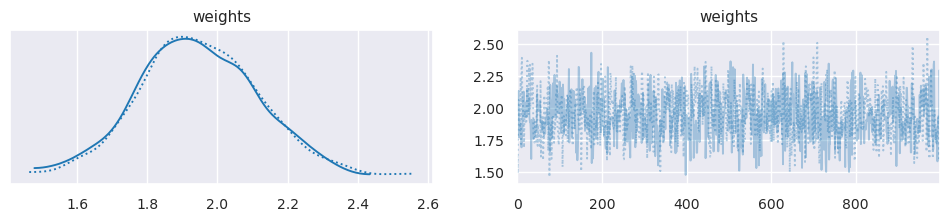

In [62]:
with pm.Model() as model:  # model specifications in PyMC3
    prior_weights = pm.Normal("weights", 0, sigma=1)

    likelihood = pm.Bernoulli(
        "y", p = sigmoid(data_x*prior_weights), observed=data_y)

    approx = pm.fit(method=pm.SVGD(n_particles=200, jitter=1.0))
    approx_struct = pm.sample(draws=1000, chains=2, return_inferencedata=True)

# print(f"\n-> approx_struct")
# print(approx_struct)
az.plot_trace(approx_struct)